<a href="https://colab.research.google.com/github/fabian57fabian/OptimizationMethodsVisualizer/blob/main/OptimizationMethodsVisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Methods Visualizer in Python

This notebook was created to give a visual understanding about Optimization Methods algotythms.


# Libraries initialization

The blocks below will set up the environment with necessary libraries.

Run the following cell to set up the system.

In [16]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
!pip install simpy

In [17]:
import time
%matplotlib inline

# Defining target function, constraints

Now let's create a function! we could either define one or create a lambda. Do as you wish.

In [18]:
#f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
def f(x,y):
  return (x-1)**2+y**2#(1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def Df(x,y):
  return 2*(x-1)+2*y

Define constraints as a list of lambdas

In [19]:
constraints = [
               #lambda x, y: (x+2*y >=1),
               #lambda x, y: (x >= 0),
               #lambda x, y: (y >= 0),
               lambda x, y: (x >= y),
               #lambda x, y: (2*x -y <= 1),
               lambda x, y: (x**2 <= y),
]

# Plot feasible region datas

In order to plot our important data we will specify the domain:

In [20]:
xmin, xmax, xstep = -4.5, 4.5, .1
ymin, ymax, ystep = -4.5, 4.5, .1
# Then we can store all the x and y points of our function directly into a mesh grid. Execute following block to create it.
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
#Now remove constrained space
for c in constraints:
  z[c(x,y)] = np.nan

# Frank-wolfe Method class

In [21]:
class FrankWolfe:
  def __init__(self):
    self.datas = []
    self.i = 0
  
  def calculate_all_points(self, f, Df):
    #Mock datas
    self.datas = [[4.2, 4.6, 3], [2.3, 3.1, 2], [2, 3, 1],[.5, .2, 1], [0, 0, 1]]

  def execute_step(self, index = -1):
    if index == -1:
      val = self.datas[self.i]
      self.i = (self.i +1) % len(self.datas)
    else:
      val = self.datas[index % len(self.datas)]
    return val
  
  def get_length(self):
    return len(self.datas)

In [22]:
# Define used method
method_used = FrankWolfe()
method_used.calculate_all_points(f, Df)

## Plotting 3d

In order to do a simple 2d plot, just create a figure and give the preprocessed coordinates.

In [23]:
# Use this: https://colab.research.google.com/drive/1lnl5UPFWVPrryaZZgEzd0theI6S94c3X#scrollTo=OEwd0xc5eGz9
# Use this for 3d: https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb#scrollTo=9Yar-dBGrSf-
from matplotlib.colors import LogNorm
import matplotlib.colors as colors

fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

cmap = plt.cm.jet
cmap.set_bad('w',1.)

def plot_datas(x, y, z, point):
  # Interesting plot : https://stackoverflow.com/questions/21504046/plotting-only-one-point-in-3d-matplotlib
  surf = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
  #surf = ax.contour3D(x, y, z,50, cmap=plt.cm.jet, alpha=.95, vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
  if point is not None:
    ax.plot([point[0]],[point[1]],[point[2]], 
            markerfacecolor='k', 
            markeredgecolor='k', 
            marker='o', 
            markersize=20, 
            alpha=0.6)
  plt.show(block=False)

# Rotate the view
#ax.view_init(60, -80) 

# Test plot:
#plot_datas(x,y,z,[0,0,1])
print("Ok")
plt.close()

Ok


# Continous plot with animation

In [24]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## My own original plot

In [25]:
# plot surfaces: https://stackoverflow.com/questions/17299917/how-to-animate-3d-plot-surface-in-matplotlib
# My code
def d_f_x_finite_difference(x_array,f_x,at_x):
  upper = np.argmax(x_array>at_x)
  lower = upper-1
  if(upper==0):
    upper = 1
    lower = 0
  return ((f_x[upper]-f_x[lower])/(x_array[upper]-x_array[lower]))

def interpolate_y(at_x, y_values, x_values):
  x_argm = np.argmax(x_values>at_x)
  x_upper = x_values[x_argm]
  x_lower = x_values[x_argm-1]
  y_upper = y_values[x_argm]
  y_lower = y_values[x_argm-1]

  slope_of_interpolation = (y_upper - y_lower)/(x_upper - x_lower)
  y_interpolated = slope_of_interpolation*at_x + (y_upper - slope_of_interpolation*x_upper)  
  return y_interpolated


def plot_datas(x, y, z, point):
  # Interesting plot : https://stackoverflow.com/questions/21504046/plotting-only-one-point-in-3d-matplotlib
  surf = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
  #surf = ax.contour3D(x, y, z,50, cmap=plt.cm.jet, alpha=.95, vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
  if point is not None:
    ax.plot([point[0]],[point[1]],[point[2]], 
            markerfacecolor='k', 
            markeredgecolor='k', 
            marker='o', 
            markersize=20, 
            alpha=0.6)
  plt.show(block=False)



xmin, xmax, xstep = -4.5, 4.5, .1
ymin, ymax, ystep = -4.5, 4.5, .1
# Then we can store all the x and y points of our function directly into a mesh grid. Execute following block to create it.
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
#Now remove constrained space
for c in constraints:
  z[c(x,y)] = np.nan


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)
plt.close()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# plot space
line1_linspace = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))
 # plot point
line2_point, = ax.plot([],[],[], 
            markerfacecolor='k', 
            markeredgecolor='k', 
            marker='o', 
            markersize=20, 
            alpha=0.6)

# Basic color map:
cmap = plt.cm.jet
cmap.set_bad('w',1.)

# initialization function: plot the background of each frame
def init():
    #line1_linspace = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))
    return (line1_linspace,)

# animation function. This is called sequentially
def animate(i):
  #ax.clear()
  #ax.clear()
  new_pt = method_used.execute_step(i)
  line2_point, = ax.plot([new_pt[0]],[new_pt[1]],[new_pt[2]], 
            markerfacecolor='k', 
            markeredgecolor='k', 
            marker='o', 
            markersize=20, 
            alpha=0.6)
  #line1_linspace = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))
  return (line1_linspace, line2_point,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [26]:
# Create a continous plot
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=method_used.get_length(), interval=1000, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

Great now we can see how our function image in the corrisponding domain.

Colors are calculated by LogNorm matplotlib color object.

## Plotting 2d

Let's now plot using only 2 dimensions but this time calculating gradient vector field and plotting it with mpl quiver's method:

In [27]:
from autograd import elementwise_grad, value_and_grad
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

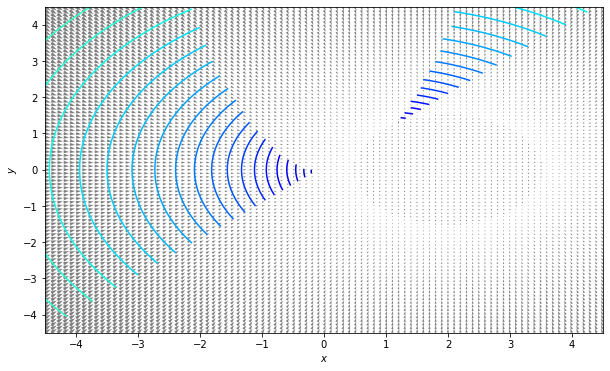

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
min, max = np.nanmin(z), np.nanmax(z)
ax.contour(x, y, z, levels=np.logspace(0, 4, 50), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
#ax.plot(*minima_, 'r*', markersize=18)

ax.plot()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

# Frank-wolfe
Thanks to https://gist.github.com/fabianp/0a3cbf128ffb4b651bd679baadc0949b for surface plotting

Thanks to https://colab.research.google.com/drive/1lnl5UPFWVPrryaZZgEzd0theI6S94c3X#scrollTo=OEwd0xc5eGz9 for FuncAnimation

Thanks to https://github.com/amkatrutsa/liboptpy for Projected Gradient and Frank Wolfe
